In [20]:
#Elliot random forest

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Validation Accuracy: 0.8707482993197279

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       123
           1       0.86      0.25      0.39        24

    accuracy                           0.87       147
   macro avg       0.86      0.62      0.66       147
weighted avg       0.87      0.87      0.84       147

Confusion Matrix (Validation Set):
[[122   1]
 [ 18   6]]
ROC AUC Score (Validation Set): 0.7469512195121951


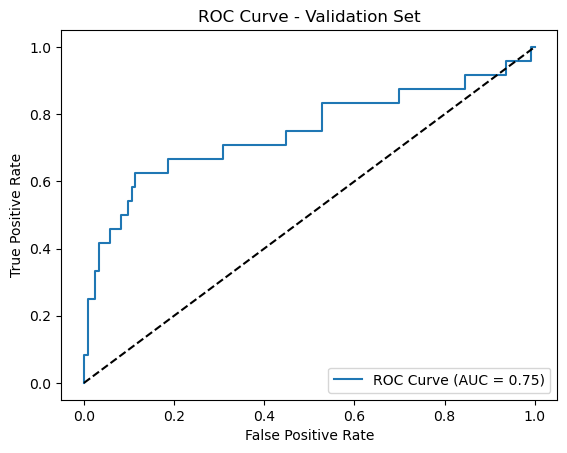


Test Accuracy: 0.8367346938775511

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       123
           1       0.50      0.08      0.14        24

    accuracy                           0.84       147
   macro avg       0.67      0.53      0.53       147
weighted avg       0.79      0.84      0.78       147

Confusion Matrix (Test Set):
[[121   2]
 [ 22   2]]
ROC AUC Score (Test Set): 0.7168021680216802


In [47]:
#Add lirbraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    confusion_matrix
)
import matplotlib.pyplot as plt


# Load and preprocess data
def load_and_preprocess(file_path):
    df = pd.read_csv(file_path)

    # Encode the target variable
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

    # One-hot encode categorical variables
    categorical_columns = ['BusinessTravel', 'EducationField', 'Gender', 'MaritalStatus']
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

    return df

# Load the dataset
file_path = 'EmployeeAttrition.csv'
df = load_and_preprocess(file_path)

# Split into features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split the dataset into Training (80%), Validation (10%), and Test (10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.10, stratify=y, random_state=123
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, stratify=y_train_val, random_state=123
)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=123)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(
    rf, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1
)
grid.fit(X_train, y_train)

# Best Random Forest model
best_rf = grid.best_estimator_

# Evaluate on validation set
y_val_pred = best_rf.predict(X_val)
y_val_pred_proba = best_rf.predict_proba(X_val)[:, 1]

# Validation metrics
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix (Validation Set):")
print(confusion_matrix(y_val, y_val_pred))
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
print("ROC AUC Score (Validation Set):", roc_auc)

# Plot ROC Curve for Validation Set
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Test set evaluation
y_test_pred = best_rf.predict(X_test)
y_test_pred_proba = best_rf.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC Score (Test Set):", roc_auc_test)
